In [1]:
import pandas as pd
import janitor
import numpy as np
from mplstereonet import *
import EBSD_Sample_ReferenceFrames as EBSD
import matplotlib.pyplot as plt

In [2]:
def Vector2Angles(vector):
    xy_length = np.sqrt(vector[0,0]**2 + vector[0,1]**2)
    plunge = np.rad2deg(np.arctan2(vector[0,2], xy_length))
    bearing = np.rad2deg(np.arctan2(vector[0,0], vector[0,1]))
    return plunge, bearing


In [3]:
# Alt vector1
phi1= 220
Phi = 103
phi2 = 62
sample_vector = [0,0,-1]
vect1 = EBSD.Crystal2Sample(sample_vector, phi1,Phi,phi2)

In [4]:
# Alt vector2
phi1= 221
Phi = 102
phi2 = 23
sample_vector = [0,0,-1]
vect2 = EBSD.Crystal2Sample(sample_vector, phi1,Phi,phi2)

In [5]:
# Alt vector3
phi1= 222
Phi = 101
phi2 = 23
sample_vector = [0,0,-1]
vect3 = EBSD.Crystal2Sample(sample_vector, phi1,Phi,phi2)

In [6]:
phi1= 41.1
Phi = 76.1
phi2 = 117.3
sample_vector = [0,0,1]
vect4 = EBSD.Crystal2Sample(sample_vector, phi1,Phi,phi2)

## EBSD Stage Orientation Setup
A1- X North-South Axis X vector positive in the North 

A2- Y East-West Axis This is positive in the West direction due to how our configuration of the EBSD is set up

A3- Z axis is the up-down axis. 

## Random Notes
The data needs to be rotated so that it is in line with the 0001 axis. That way we can use the crystallographic reference frame for each vector. It may eventually require a 6-fold rotation to line up with the crystal symmetry but for now we will assume that our samples from multiple crystals wont bias the results. 


## Sample Reference Frame Quartz Orientation
Plotting the EBSD Pole figure for the quartz 0001 pole as measured. Note that the figure has been rotated 90˚ counterclockwise. This has to do with the SEM stage configuration and we can either choose to change it or not

This sample has an orientation of the [0001] that is ~47˚ to the right of the A1 Axis (North in the SEM) and dips ~ 13˚ upwards

**Note to self:**
I am pretty sure that the pole figures from the EBSD are upper hemisphere while most plotting software assumes a lower hemisphere. I am just plotting all my dips assuming they are in the upper hemisphere but I need to determine if there are cases where this wont work
![Quartz Pole Figure](Jill_M2_g5/Jill_m2_g5_IQ+PF.png)

**Structure Matrix**
We need to determine if we need to multiply by the crystal structure matrix. This seems to distort how things are rotated. I need to read up more on if this is necessary. I also need to check whether its multiplying a column or a row vector


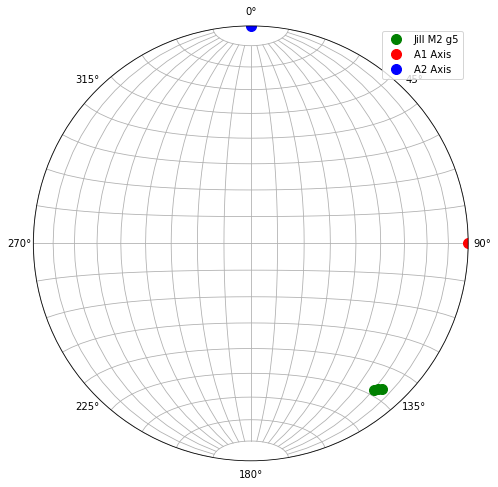

In [79]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet',)


plunge, bearing = Vector2Angles(vect1)
ax.line(plunge, bearing, 'go', markersize=10)

plunge, bearing = Vector2Angles(vect2)
ax.line(plunge, bearing, 'go', markersize=10)

plunge, bearing = Vector2Angles(vect3)
ax.line(plunge, bearing, 'go', markersize=10, Label = "Jill M2 g5")

plunge, bearing = Vector2Angles(np.matrix([1,0,0]))
ax.line(plunge, bearing, 'ro', markersize=10, Label = "A1 Axis")


plunge, bearing = Vector2Angles(np.matrix([0,1,0]))
ax.line(plunge, bearing, 'bo', markersize=10, Label = "A2 Axis")

ax.legend()
ax.grid()
plt.show()

In [8]:
df= pd.read_csv('Jill_M2_g5/VG fit Jill m2g5.csv')

In [9]:
df =df.clean_names()


In [10]:
df.head()

,group,name,status,type,position_x_[voxel],position_y_[voxel],position_z_[voxel],direction_x,direction_y,direction_z,...,valley_[mm],construction_method,image,focused_image,histogram_image,captures,coordinate_system,centroid_x_[voxel],centroid_y_[voxel],centroid_z_[voxel]
0,NaN,Line 1,Ok,Line,1232,1177,5,0.22,0.97,0.00,...,0.0,Gauss (least squares) fitted,Off,Off,None,0,Volume 1 grid coordinate system,1206,1064,5
1,NaN,Line 2,Ok,Line,772,913,17,-0.25,0.97,0.01,...,0.0,Gauss (least squares) fitted,Off,Off,None,0,Volume 1 grid coordinate system,777,894,16
2,NaN,Line 3,Ok,Line,719,995,61,-0.24,0.97,0.01,...,0.0,Gauss (least squares) fitted,Off,Off,None,0,Volume 1 grid coordinate system,716,1005,61
3,NaN,Line 4,Ok,Line,806,649,53,-0.24,0.97,0.01,...,0.0,Gauss (least squares) fitted,Off,Off,None,0,Volume 1 grid coordinate system,804,657,54
4,NaN,Line 5,Ok,Line,434,1452,36,0.97,-0.23,0.00,...,0.0,Gauss (least squares) fitted,Off,Off,None,0,Volume 1 grid coordinate system,441,1450,36


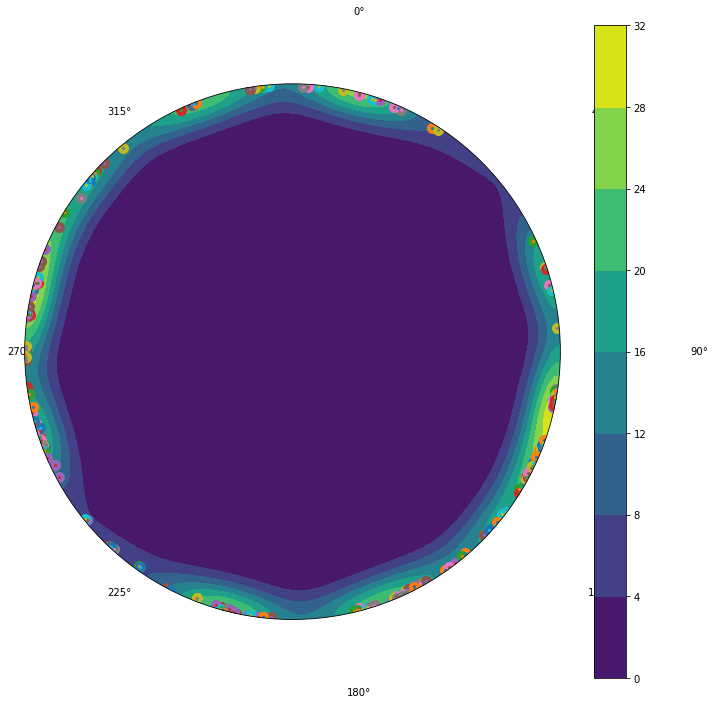

In [77]:
Plunges= []
Bearings= []
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='stereonet',)

for ix in df.index:
    x,y,z = -df.loc[ix]['direction_x'], -df.loc[ix]['direction_y'], df.loc[ix]['direction_z']
    
    plunge, bearing = Vector2Angles(np.matrix([x,y,z]))
    if z <0:
        plunge, bearing = Vector2Angles(-np.matrix([x,y,z]))
    
    Plunges.append(plunge)
    Bearings.append(bearing)
    

ax.line(Plunges, Bearings, markersize=10) 
"""
A1 = EBSD.Sample2Crystal([1,0,0], phi1,Phi,phi2)
plunge, bearing = Vector2Angles(A1)
ax.line(plunge, bearing, 'ro', markersize=10, Label = "A1 Axis")

A2 = EBSD.Sample2Crystal([0,1,0], phi1,Phi,phi2)
plunge, bearing = Vector2Angles(-A2)
ax.line(plunge, bearing, 'bo', markersize=10, Label = "A2 Axis")

A3 = EBSD.Sample2Crystal([0,0,1], phi1,Phi,phi2)
plunge, bearing = Vector2Angles(A3)
ax.line(plunge, bearing, 'yo', markersize=10, Label = "A3 Axis")
"""
cax = ax.density_contourf(Plunges, Bearings, measurement='lines')
ax.line(Plunges, Bearings, markersize=2)
ax.grid(True)
fig.colorbar(cax)
ax.grid()

plt.show()

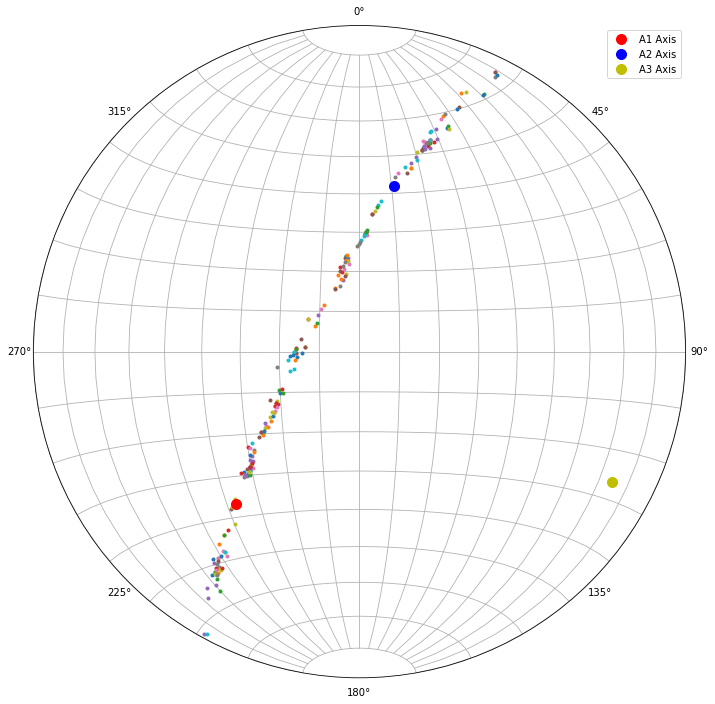

In [38]:
Plunges= []
Bearings= []
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='stereonet',)

for ix in df.index:
    x,y,z = -df.loc[ix]['direction_x'], -df.loc[ix]['direction_y'], df.loc[ix]['direction_z']
    
    vector = EBSD.Sample2Crystal([x,y,z], phi1,Phi,phi2)
    
    plunge, bearing = Vector2Angles(vector)
    if vector[0,2] <0:
        plunge, bearing = Vector2Angles(-vector)
    
    Plunges.append(plunge)
    Bearings.append(bearing)
    

ax.line(Plunges, Bearings, markersize=3)

A1 = EBSD.Sample2Crystal([1,0,0], phi1,Phi,phi2)
plunge, bearing = Vector2Angles(A1)
ax.line(plunge, bearing, 'ro', markersize=10, Label = "A1 Axis")

A2 = EBSD.Sample2Crystal([0,1,0], phi1,Phi,phi2)
plunge, bearing = Vector2Angles(-A2)
ax.line(plunge, bearing, 'bo', markersize=10, Label = "A2 Axis")

A3 = EBSD.Sample2Crystal([0,0,1], phi1,Phi,phi2)
plunge, bearing = Vector2Angles(A3)
ax.line(plunge, bearing, 'yo', markersize=10, Label = "A3 Axis")

ax.legend()
ax.grid()

plt.show()

In [37]:
vector

matrix([[0.24333129, 0.77855135, 0.56916402]])

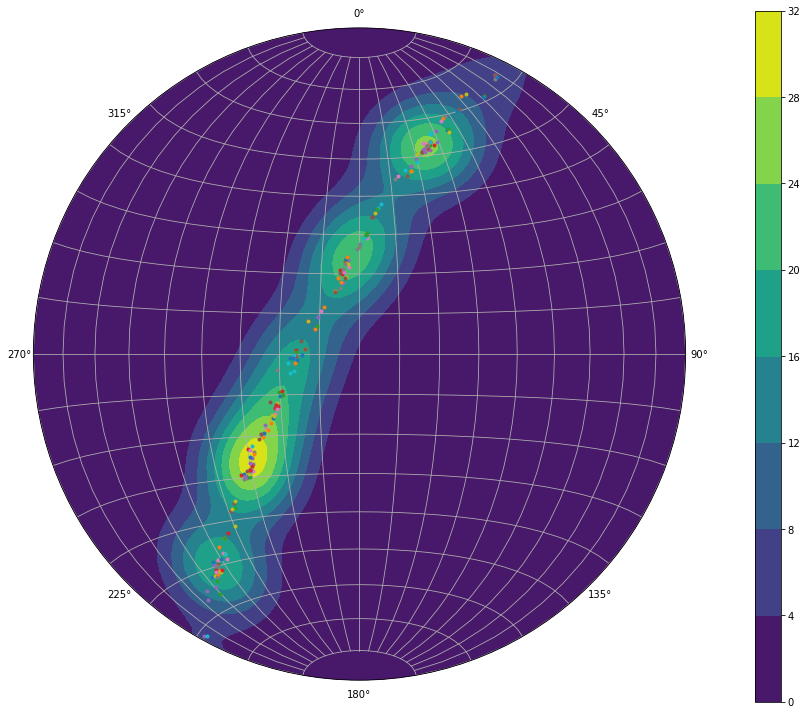

In [73]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='stereonet',)
cax = ax.density_contourf(Plunges, Bearings, measurement='lines')
ax.line(Plunges, Bearings, markersize=3)
ax.grid(True)

cbaxes = fig.add_axes([0.97, 0.1, 0.03, 0.8]) 
cax = ax.density_contourf(Plunges, Bearings, measurement='lines', )
fig.colorbar(cax,cax= cbaxes)

plt.show()

In [76]:
eigenvectors(Plunges,Bearings, measurement = "lines")

(array([72.04929264, 11.41835851, 13.66278036]),
 array([256.02390719,  24.59026463, 117.40437347]),
 array([5.84378433e-01, 4.17628044e-01, 1.81706558e-04]))

In [20]:
Plunges = np.array(Plunges)
comb_plunges = np.append(Plunges,Plunges)
comb_plunges = np.append(comb_plunges,Plunges)

Bearings = np.array(Bearings)
comb_bearings = np.append(Bearings,Bearings + 120)
comb_bearings = np.append(comb_bearings,Bearings + 240)

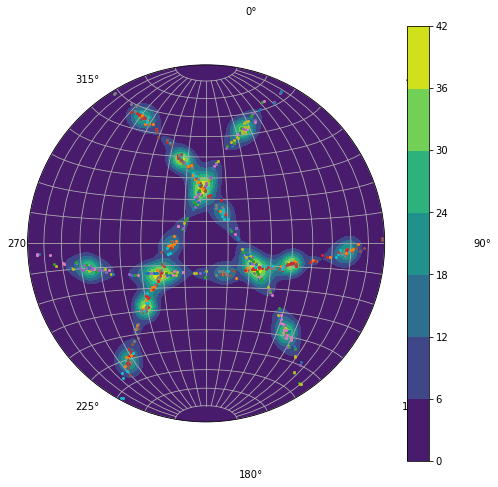

In [74]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet',)
cax = ax.density_contourf(comb_plunges, comb_bearings, measurement='lines')
ax.line(comb_plunges, comb_bearings, markersize=2)
ax.grid(True)
fig.colorbar(cax)

plt.show()

We can compare this plot with the orientation for the crystallographic reference frame used by EDAX OIM
![Hex-ref-frame](EBSD_Reference_Frame_Photos/Crystallographic_orientation.png)

## Plotting the Rutile Needle Locations in the Sample Reference Frame
    If we assume a constant length of 100 voxels (can be converted to length) We can get a better idea of the rutile needle fabric.

Text(0.5, 0, 'X (Voxels)')

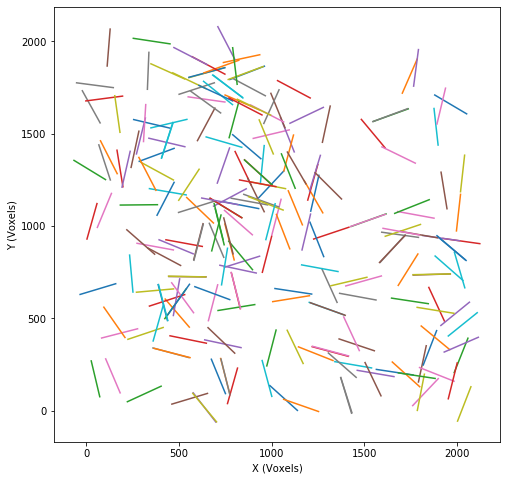

In [193]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,)
for ix in df.index:
    X,Y,Z = df.loc[ix]['position_x_[voxel]'], df.loc[ix]['position_y_[voxel]'], df.loc[ix]['position_z_[voxel]']
    x,y,z = df.loc[ix]['direction_x'], df.loc[ix]['direction_y'], df.loc[ix]['direction_z']
    vector = np.matrix([x,y,z])
    S=100
    ax.plot([vector[0,0]*S+X,-vector[0,0]*S+X], [vector[0,1]*S+Y,-vector[0,1]*S+Y], )
ax.set_ylabel('Y (Voxels)')
ax.set_xlabel('X (Voxels)')

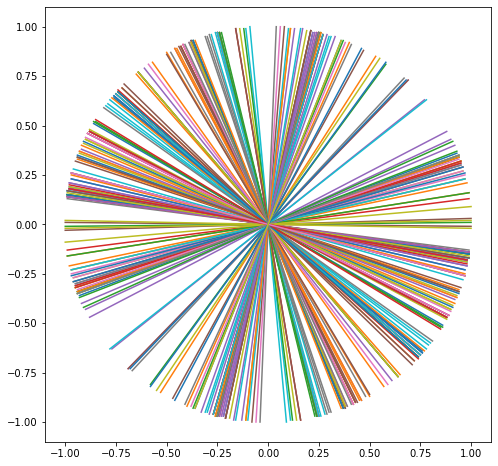

In [177]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,)
for ix in df.index:
    X,Y,Z = df.loc[ix]['position_x_[voxel]'], df.loc[ix]['position_y_[voxel]'], df.loc[ix]['position_z_[voxel]']
    x,y,z = df.loc[ix]['direction_x'], df.loc[ix]['direction_y'], df.loc[ix]['direction_z']
    vector = np.matrix([x,y,z])
    S=100
    ax.plot([vector[0,0],-vector[0,0]], [vector[0,1],-vector[0,1]])
    

This figure doesn't reveal much. Maybe if I could color based on density of an orientation it would be more useful